# Dataset
    Tahap pertama yang dilakukan untuk mengimplementasikan metode adalah mempersiapkan data terlebih dahulu

### 1. Membaca file json

In [33]:
import json

with open("dataset/guci_intent.json") as guci_dataset:
  dataset = json.load(guci_dataset)

print(dataset)

{'intents': [{'intent': 'Basic1', 'text': ["Assalamu'alaikum", 'mikum', 'ass', "assalamu'alaikum wr.wb"], 'responses': ['Selamat datang di chatboot Wisata guci,saya siap memandu anda untuk rekreasi, silahkan ketikan destinasi yang ingin anda kunjungi', "wa'alaikumusallam wr. Wb, Apakah ada yang bisa kami bantu?tolong ketikan apa yang anda hendak kunjungi di objek wisata guci "], 'extension': {'function': '', 'entities': False, 'responses': []}, 'context': {'in': '', 'out': 'pembuka', 'clear': False}, 'entityType': 'NA', 'entities': []}, {'intent': 'Basic2', 'text': ['tiket masuk guci', 'HTM', 'tiket', 'biaya'], 'responses': ['harga tiket masuk guci pada hari biasa sebesar RP. 10.000, jika hari libur harga tiket masuk guci sebesar Rp. 15.000'], 'extension': {'function': '', 'entities': False, 'responses': []}, 'context': {'in': '', 'out': 'harga', 'clear': False}, 'entityType': 'NA', 'entities': []}, {'intent': 'Basic3', 'text': ['rekomendasi wisata terbaik di guci', 'apa saja wisata te

### 2. Memecah data dari json ke variabel

In [34]:
def processing_json_dataset(dataset):
  tags = []
  inputs = []
  responses={}
  for intent in dataset['intents']:
    responses[intent['intent']]=intent['responses']
    for lines in intent['text']:
      inputs.append(lines)
      tags.append(intent['intent'])
  return [tags, inputs, responses]

[tags, inputs, responses] = processing_json_dataset(dataset)
print(f'tags : {tags}')
print(f'inputs : {inputs}')
print(f'responses : {responses}')

tags : ['Basic1', 'Basic1', 'Basic1', 'Basic1', 'Basic2', 'Basic2', 'Basic2', 'Basic2', 'Basic3', 'Basic3', 'Basic4', 'Basic4', 'Basic5', 'Basic5', 'Basic5', 'Basic6', 'Basic6', 'Basic7', 'Basic7', 'Basic8', 'Basic8', 'Basic9', 'Basic9', 'Basic9', 'Basic9', 'Basic9', 'Basic9', 'lokasi1', 'lokasi1', 'lokasi1', 'lokasi1', 'lokasi2', 'lokasi2', 'lokasi2', 'lokasi2', 'lokasi3', 'lokasi3', 'lokasi3', 'lokasi3', 'lokasi4', 'lokasi4', 'lokasi4', 'lokasi5', 'lokasi5', 'lokasi5', 'lokasi6', 'lokasi6', 'lokasi6', 'lokasi6', 'lokasi6', 'lokasi7', 'lokasi7', 'lokasi7', 'lokasi8', 'lokasi8', 'lokasi8', 'lokasi9', 'lokasi9', 'lokasi9', 'lokasi10', 'lokasi10', 'lokasi10', 'lokasi11', 'lokasi11', 'lokasi11', 'lokasi11', 'lokasi11', 'lokasi12', 'lokasi12', 'lokasi12', 'lokasi12', 'lokasi13', 'lokasi13', 'lokasi13', 'lokasi13', 'lokasi14', 'lokasi14', 'lokasi14', 'lokasi14', 'lokasi15', 'lokasi15', 'lokasi15', 'lokasi16', 'lokasi16', 'lokasi17', 'lokasi17', 'lokasi17', 'lokasi17', 'lokasi18', 'lokasi18'

### 3. Memasukkan data ke dalam pandas DataFrame

In [35]:
import pandas as pd

dataset = pd.DataFrame({"inputs":inputs, "tags":tags})
dataset

,inputs,tags
0,Assalamu'alaikum,Basic1
1,mikum,Basic1
2,ass,Basic1
3,assalamu'alaikum wr.wb,Basic1
4,tiket masuk guci,Basic2
...,...,...
117,gulala guci,lokasi26
118,gulala,lokasi26
119,hotel gran dian?,lokasi27
120,gran dian guci?,lokasi27


### 4. Mengacak data

In [36]:
dataset = dataset.sample(frac=1, random_state=42)
dataset

,inputs,tags
18,tolong bantu saya,Basic7
45,pemandian pancuran13?,lokasi6
47,pemandian air panas,lokasi6
89,cafe guci,lokasi18
4,tiket masuk guci,Basic2
...,...,...
106,rawamba,lokasi23
14,bagaimana hari ini?,Basic5
92,kafe guci,lokasi19
51,water boom guciku?,lokasi7


# Preprocessing
    Menyiapkan data agar dapat diproses oleh algoritma lebih baik, langka-langkahnya antara lain :

### 1. Tokenisasi
    Memecah teks menjadi unit-unit lebih kecil, dalam hal ini memisahkan setiap karakter termasuk spasi dan tanda baca

In [37]:
dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs for ltrs in sequence])
dataset

,inputs,tags
18,"[t, o, l, o, n, g, , b, a, n, t, u, , s, a, ...",Basic7
45,"[p, e, m, a, n, d, i, a, n, , p, a, n, c, u, ...",lokasi6
47,"[p, e, m, a, n, d, i, a, n, , a, i, r, , p, ...",lokasi6
89,"[c, a, f, e, , g, u, c, i]",lokasi18
4,"[t, i, k, e, t, , m, a, s, u, k, , g, u, c, i]",Basic2
...,...,...
106,"[r, a, w, a, m, b, a]",lokasi23
14,"[b, a, g, a, i, m, a, n, a, , h, a, r, i, , ...",Basic5
92,"[k, a, f, e, , g, u, c, i]",lokasi19
51,"[w, a, t, e, r, , b, o, o, m, , g, u, c, i, ...",lokasi7


### 2. Cleaning
    Membersihkan simbol-simbol seperti tanda baca, tag-tag html dll

In [38]:
import string

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs for ltrs in sequence if ltrs not in string.punctuation])
dataset

,inputs,tags
18,"[t, o, l, o, n, g, , b, a, n, t, u, , s, a, ...",Basic7
45,"[p, e, m, a, n, d, i, a, n, , p, a, n, c, u, ...",lokasi6
47,"[p, e, m, a, n, d, i, a, n, , a, i, r, , p, ...",lokasi6
89,"[c, a, f, e, , g, u, c, i]",lokasi18
4,"[t, i, k, e, t, , m, a, s, u, k, , g, u, c, i]",Basic2
...,...,...
106,"[r, a, w, a, m, b, a]",lokasi23
14,"[b, a, g, a, i, m, a, n, a, , h, a, r, i, , ...",Basic5
92,"[k, a, f, e, , g, u, c, i]",lokasi19
51,"[w, a, t, e, r, , b, o, o, m, , g, u, c, i, ...",lokasi7


### 3. Case Folding
    Mengubah case semua huruf menjadi huruf kecil

In [39]:

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs.lower() for ltrs in sequence])
dataset

,inputs,tags
18,"[t, o, l, o, n, g, , b, a, n, t, u, , s, a, ...",Basic7
45,"[p, e, m, a, n, d, i, a, n, , p, a, n, c, u, ...",lokasi6
47,"[p, e, m, a, n, d, i, a, n, , a, i, r, , p, ...",lokasi6
89,"[c, a, f, e, , g, u, c, i]",lokasi18
4,"[t, i, k, e, t, , m, a, s, u, k, , g, u, c, i]",Basic2
...,...,...
106,"[r, a, w, a, m, b, a]",lokasi23
14,"[b, a, g, a, i, m, a, n, a, , h, a, r, i, , ...",Basic5
92,"[k, a, f, e, , g, u, c, i]",lokasi19
51,"[w, a, t, e, r, , b, o, o, m, , g, u, c, i, ...",lokasi7


In [40]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ''.join(wrd))
dataset

,inputs,tags
18,tolong bantu saya,Basic7
45,pemandian pancuran13,lokasi6
47,pemandian air panas,lokasi6
89,cafe guci,lokasi18
4,tiket masuk guci,Basic2
...,...,...
106,rawamba,lokasi23
14,bagaimana hari ini,Basic5
92,kafe guci,lokasi19
51,water boom guciku,lokasi7


### 4. Stemming
    Yaitu mengubah setiap kata pada kalimat yang mengandung tambahan seperti awalan dan akhiran menjadi kata baku. dalam hal ini menggunakan library Sastrawi

In [41]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [stemmer.stem(word) for word in sequence.split()])
dataset

,inputs,tags
18,"[tolong, bantu, saya]",Basic7
45,"[mandi, pancuran13]",lokasi6
47,"[mandi, air, panas]",lokasi6
89,"[cafe, guci]",lokasi18
4,"[tiket, masuk, guci]",Basic2
...,...,...
106,[rawamba],lokasi23
14,"[bagaimana, hari, ini]",Basic5
92,"[kafe, guci]",lokasi19
51,"[water, boom, guci]",lokasi7


### 5. Stop Word Removal
    Yaitu menghapus setiap kata hubung yang terdapat pada kalimat, dalam hal ini menggunakan fungsi lambda

In [42]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory()
stop_tambahan = ["dengan", "ia","bahwa", "oleh"]
allstop = stop_factory.get_stop_words() + stop_tambahan
print(allstop)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [43]:
def stopword(word):
    if word in stop_tambahan:
        return ""
    else:
        return word

dataset['inputs'] = dataset['inputs'].apply(lambda words: " ".join([stopword(word) for word in words]))
dataset

,inputs,tags
18,tolong bantu saya,Basic7
45,mandi pancuran13,lokasi6
47,mandi air panas,lokasi6
89,cafe guci,lokasi18
4,tiket masuk guci,Basic2
...,...,...
106,rawamba,lokasi23
14,bagaimana hari ini,Basic5
92,kafe guci,lokasi19
51,water boom guci,lokasi7


# Transformasi
    Mentransformasikan huruf menjadi angka sehingga dapat diproses lebih baik oleh model, dalam hal ini menggunakan Tokenizer yang terdapat pada keras didalam library tensorflow untuk data input, dan LabelEncoder yang terdapat pada library Sklearn untuk data target / kelas / intent

### 1. Transformasi input

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(dataset['inputs'])
train = tokenizer.texts_to_sequences(dataset['inputs'])
print(tokenizer.word_index)

{'guci': 1, 'hotel': 2, 'mandi': 3, 'inap': 4, 'cafe': 5, 'wisata': 6, 'alam': 7, 'di': 8, 'air': 9, 'grand': 10, 'gulala': 11, 'barokah': 12, 'onsen': 13, 'panas': 14, 'duta': 15, 'forest': 16, 'mega': 17, 'gung': 18, 'dian': 19, 'salma': 20, 'ashafana': 21, 'sabda': 22, 'rawamba': 23, 'water': 24, 'boom': 25, 'ta': 26, 'kampung': 27, 'spot': 28, 'foto': 29, 'the': 30, 'rindu': 31, 'kencana': 32, 'bantu': 33, 'saya': 34, 'tiket': 35, 'joglo': 36, 'ageng': 37, 'gran': 38, 'serwiti': 39, 'assalamualaikum': 40, 'tempat': 41, 'apa': 42, 'kabar': 43, 'baik': 44, 'fyp': 45, 'sun': 46, 'q': 47, 'kafe': 48, 'rekomendasi': 49, 'bagaimana': 50, 'cod': 51, 'geong': 52, 'tolong': 53, 'pancuran13': 54, 'masuk': 55, 'hallo': 56, 'gbugs': 57, 'shelter': 58, 'halo': 59, 'azana': 60, 'ok': 61, 'camping': 62, 'ground': 63, 'cukup': 64, 'nongkrong': 65, 'sunq': 66, 'start': 67, 'prosotan': 68, 'warna': 69, 'warni': 70, 'selesai': 71, 'gubug': 72, 'selter': 73, 'gta': 74, 'lokasi': 75, 'terjun': 76, 'pin

In [45]:
features = pad_sequences(train)
print(train)

[[53, 33, 34], [3, 54], [3, 9, 14], [5, 1], [35, 55, 1], [4, 15, 6], [2, 1, 16], [2, 10, 17, 1], [2, 36, 37], [1, 18], [2, 1, 18], [2, 38, 19], [56], [5, 57, 58], [10, 17], [59], [39, 1], [2, 20], [2, 11, 60], [40], [61], [1, 21], [62, 63], [2, 22, 7], [64], [2, 1, 21], [4, 23], [41, 65, 1], [24, 25, 66, 26], [22, 7], [42, 43], [67], [68, 69, 70], [71], [5, 11], [72, 73], [74], [75, 12, 1], [9, 76, 1], [3, 77], [42, 78, 6, 44, 8, 1], [36, 37], [79], [45, 80], [2, 12], [38, 19, 1], [3, 13], [81], [1, 16], [82, 83, 1], [2, 15, 6], [84, 85], [2, 46, 47, 26], [86], [2, 87, 88], [89, 1], [2, 27, 1], [90], [3, 1, 21], [28, 29, 1], [28, 29, 1], [28, 29, 1], [91, 92, 12], [93], [48], [13, 1], [49, 6, 44, 8, 1], [50, 43], [27, 1], [40, 94], [34, 95, 33], [96], [5, 51], [35], [6, 97, 1], [2, 23], [5, 1], [4, 1, 18], [2, 1], [30, 52], [3, 9, 14, 1], [4, 13, 1], [31, 7], [11], [2, 30, 52], [51, 1], [15, 6, 1], [20], [49, 3, 9, 14], [98, 5], [11, 1], [5, 20, 1], [99, 39], [2, 100, 8, 1], [45], [6, 

In [46]:
print(features)

[[  0   0   0  53  33  34]
 [  0   0   0   0   3  54]
 [  0   0   0   3   9  14]
 [  0   0   0   0   5   1]
 [  0   0   0  35  55   1]
 [  0   0   0   4  15   6]
 [  0   0   0   2   1  16]
 [  0   0   2  10  17   1]
 [  0   0   0   2  36  37]
 [  0   0   0   0   1  18]
 [  0   0   0   2   1  18]
 [  0   0   0   2  38  19]
 [  0   0   0   0   0  56]
 [  0   0   0   5  57  58]
 [  0   0   0   0  10  17]
 [  0   0   0   0   0  59]
 [  0   0   0   0  39   1]
 [  0   0   0   0   2  20]
 [  0   0   0   2  11  60]
 [  0   0   0   0   0  40]
 [  0   0   0   0   0  61]
 [  0   0   0   0   1  21]
 [  0   0   0   0  62  63]
 [  0   0   0   2  22   7]
 [  0   0   0   0   0  64]
 [  0   0   0   2   1  21]
 [  0   0   0   0   4  23]
 [  0   0   0  41  65   1]
 [  0   0  24  25  66  26]
 [  0   0   0   0  22   7]
 [  0   0   0   0  42  43]
 [  0   0   0   0   0  67]
 [  0   0   0  68  69  70]
 [  0   0   0   0   0  71]
 [  0   0   0   0   5  11]
 [  0   0   0   0  72  73]
 [  0   0   0   0   0  74]
 

In [47]:
import pickle

with open('output/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 2. Transformasi Target

In [48]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])
for i in range(len(le.classes_)):
    print(f'{i} : {le.classes_[i]}')
print(labels)
np.save('output/classes.npy', le.classes_)

0 : Basic1
1 : Basic2
2 : Basic3
3 : Basic4
4 : Basic5
5 : Basic6
6 : Basic7
7 : Basic8
8 : Basic9
9 : lokasi1
10 : lokasi10
11 : lokasi11
12 : lokasi12
13 : lokasi13
14 : lokasi14
15 : lokasi15
16 : lokasi16
17 : lokasi17
18 : lokasi18
19 : lokasi19
20 : lokasi2
21 : lokasi20
22 : lokasi21
23 : lokasi22
24 : lokasi23
25 : lokasi24
26 : lokasi25
27 : lokasi26
28 : lokasi27
29 : lokasi3
30 : lokasi4
31 : lokasi5
32 : lokasi6
33 : lokasi7
34 : lokasi8
35 : lokasi9
[ 6 32 32 18  1 30 11 25 20 34 34 28  3 19 25  3 14 35 27  0  8 31 11 22
  8 31 24 19 29 22  4  5 13  8 27 19 16  9 14 11  2 20  8 12  9 28 26  1
 11 12 30 32 29  5 12 20 17  1 31 13 12 15  9  7 21 26  2  4 17  0  6 29
 21  1 14 24 21 34 33 15 32 26 10 27 15 21 30 35 32 18 27 35 14 20 26 10
 11 23 29  9 25  0 33  8  0  8 23 22 17 26 13 17 16 28  7 10 13 24  4 19
 33 23]


In [49]:
input_shape = features.shape[1]
print(input_shape)
print(features.shape)

6
(122, 6)


In [50]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  119
output length:  36


# Membagi data training dan data testing
Dataset akan dibagi menjadi data latih dan data uji untuk diproses pada pelatihan dan evaluasi

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

# Pelatihan
    Pada tahap ini, akan di implementasikan metode yang telah di susun dengan data yang telah dibersihkan

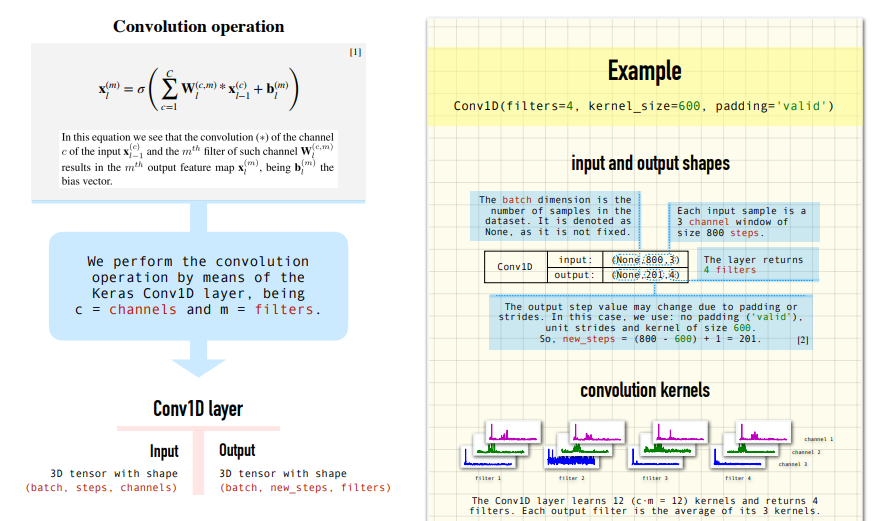

### 1. Inisialisasi Model

In [52]:
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D
import tensorflow as tf

m = Sequential()
m.add(Input(shape=(features.shape[1],))) # mendeklarasikan layer input dengan jumlah kata terbanyak di data set berdasarkan fitur pada data set setelah dilakukan tokenizer(mengubah kata menjadi angka)
m.add(Embedding(vocabulary + 1,50))  
m.add(Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))) # shadow layer (konfolusi)
m.add(Dropout(0.3))
m.add(LSTM(32, dropout=0.3,return_sequences=True)) # shadow layer lstm 
m.add(LSTM(16, dropout=0.3,return_sequences=False)) # shadow layer lstm
m.add(Dense(128,activation="relu", activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
m.add(Dropout(0.6))
m.add(Dense(output_length, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))

In [53]:
m.layers

### 2. Implementasi Word Embedding
    Word embeddings adalah proses konversi kata yang berupa karakter alphanumeric kedalam bentuk vector, ini di implementasikan bersama layer pada RNN

In [54]:
glove_dir = "glove/glove_50dim_wiki.id.case.text.txt"
embeddings_index = {}
file_ = open(glove_dir, encoding="utf8")
for line in file_:
    arr = line.split()
    single_word = arr[0]
    w = np.asarray(arr[1:],dtype='float32')
    embeddings_index[single_word] = w
file_.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 370013 word vectors.


In [55]:
max_words = vocabulary + 1
word_index = tokenizer.word_index
X_train = features
y_train = labels
embedding_matrix = np.zeros((max_words,50)).astype(object)
for word , i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
X_test = features
y_test = labels

In [56]:
m.layers[0].set_weights([embedding_matrix])
m.layers[0].trainable = False

In [57]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [58]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 50)             6000      
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             8032      
                                                                 
 dropout_2 (Dropout)         (None, 2, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 2, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 128)               2176      
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [59]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 400, mode = 'min', restore_best_weights = True)

### 3. Menjalankan Pelatihan

In [60]:
history_training = m.fit(X_train,y_train,epochs=2000, batch_size=64, callbacks=[earlyStopping])

Epoch 1/2000
2/2 [==============================] - 42s 67ms/step - loss: 3.5891 - accuracy: 0.0492
Epoch 2/2000
2/2 [==============================] - 0s 37ms/step - loss: 3.5880 - accuracy: 0.0164
Epoch 3/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.5885 - accuracy: 0.0164
Epoch 4/2000
2/2 [==============================] - 0s 38ms/step - loss: 3.5825 - accuracy: 0.0164
Epoch 5/2000
2/2 [==============================] - 0s 20ms/step - loss: 3.5833 - accuracy: 0.0246
Epoch 6/2000
2/2 [==============================] - 0s 43ms/step - loss: 3.5809 - accuracy: 0.0492
Epoch 7/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.5803 - accuracy: 0.0820
Epoch 8/2000
2/2 [==============================] - 0s 24ms/step - loss: 3.5816 - accuracy: 0.0410
Epoch 9/2000
2/2 [==============================] - 0s 38ms/step - loss: 3.5793 - accuracy: 0.0410
Epoch 10/2000
2/2 [==============================] - 0s 42ms/step - loss: 3.5744 - accuracy: 0.0410
Epoch 11

### 4. Visualisasi Hasil Pelatihan

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw_plot(data, type_data):
  # mpl.style.use('seaborn')
  plt.figure(figsize = (25, 5))
  plt.plot(data,'darkorange', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

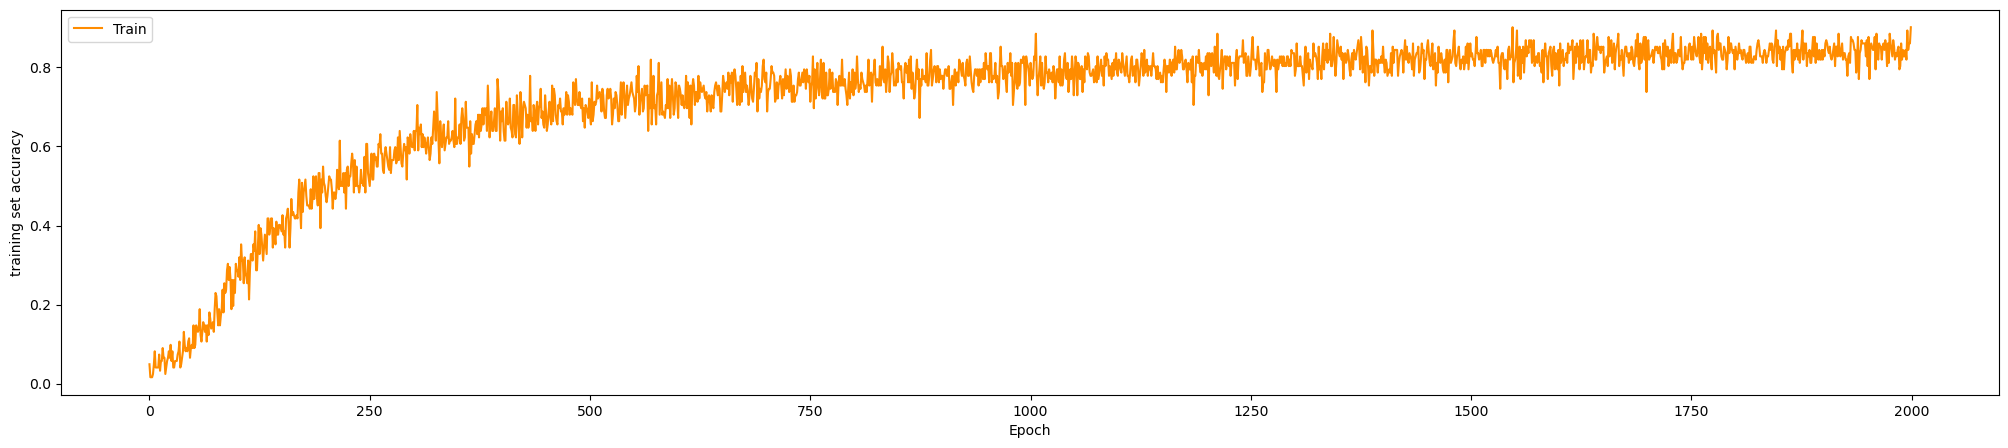

In [62]:
draw_plot(history_training.history['accuracy'],'training set accuracy' )

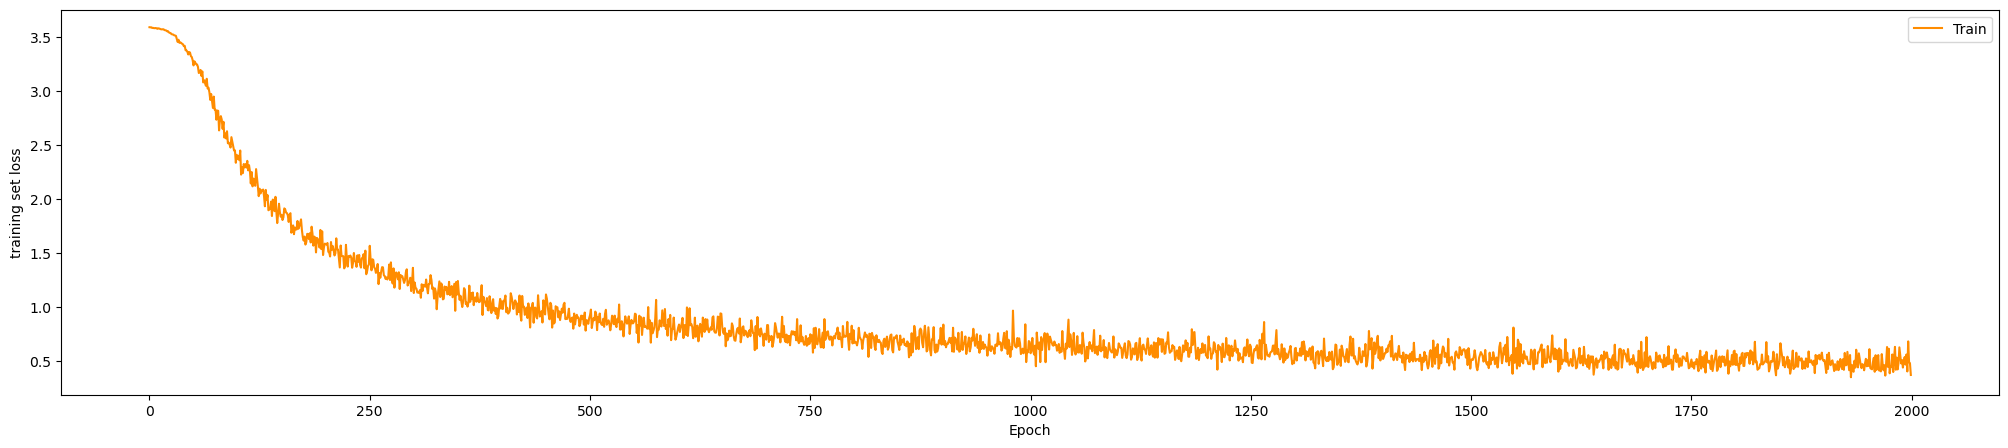

In [63]:
draw_plot(history_training.history['loss'],'training set loss' )

# Evaluasi

In [64]:
y_pred = m.predict(X_test)
print(y_test, y_pred)
m.evaluate(X_test, y_test, batch_size = 64)

4/4 [==============================] - 6s 7ms/step
[ 6 32 32 18  1 30 11 25 20 34 34 28  3 19 25  3 14 35 27  0  8 31 11 22
  8 31 24 19 29 22  4  5 13  8 27 19 16  9 14 11  2 20  8 12  9 28 26  1
 11 12 30 32 29  5 12 20 17  1 31 13 12 15  9  7 21 26  2  4 17  0  6 29
 21  1 14 24 21 34 33 15 32 26 10 27 15 21 30 35 32 18 27 35 14 20 26 10
 11 23 29  9 25  0 33  8  0  8 23 22 17 26 13 17 16 28  7 10 13 24  4 19
 33 23] [[6.5319826e-17 3.2294869e-05 7.3906931e-12 ... 1.4275529e-11
  4.3010302e-09 4.0672007e-11]
 [4.3517237e-10 4.9915882e-14 1.3560005e-13 ... 1.7782139e-07
  2.6921532e-07 9.8759716e-13]
 [5.3679547e-11 3.2422820e-15 9.6199626e-14 ... 5.8078786e-10
  1.0788023e-08 1.0358805e-15]
 ...
 [3.9554045e-19 1.3816589e-08 1.7882326e-14 ... 1.8268704e-05
  1.2414960e-06 1.5808097e-06]
 [2.5439774e-14 5.1029948e-13 1.2845845e-16 ... 9.9684745e-01
  9.1654556e-08 1.6890537e-05]
 [2.3918169e-22 9.6449556e-16 2.8876432e-10 ... 1.8280761e-07
  3.1279007e-05 1.3083543e-15]]
2/2 [=======

[0.24552729725837708, 0.9098360538482666]

# Simpan Model

In [65]:
m.save("output/guci.keras")

# Contoh Penggunaan Model

In [66]:
encoder = LabelEncoder()
encoder.classes_ = np.load('output/classes.npy', allow_pickle=True)
print(encoder.classes_)

['Basic1' 'Basic2' 'Basic3' 'Basic4' 'Basic5' 'Basic6' 'Basic7' 'Basic8'
 'Basic9' 'lokasi1' 'lokasi10' 'lokasi11' 'lokasi12' 'lokasi13' 'lokasi14'
 'lokasi15' 'lokasi16' 'lokasi17' 'lokasi18' 'lokasi19' 'lokasi2'
 'lokasi20' 'lokasi21' 'lokasi22' 'lokasi23' 'lokasi24' 'lokasi25'
 'lokasi26' 'lokasi27' 'lokasi3' 'lokasi4' 'lokasi5' 'lokasi6' 'lokasi7'
 'lokasi8' 'lokasi9']


In [67]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  print(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  print(pred_input)
  pred_input = np.array(pred_input).reshape(-1)
  print(pred_input)
  pred_input = pad_sequences([pred_input],input_shape)
  print(pred_input)
  output = m.predict(pred_input)
  output = output.argmax()
  response_tag = encoder.inverse_transform([output])[0]
  print(response_tag)
  return random.choice(responses[response_tag])

In [68]:
list_que = ["gulala","penginapan kampung guci ?","hallo", "HTM"]
for i in list_que:
  print("you: {}".format(i))
  res_tag = generate_answer(i)
  print(res_tag)  

you: gulala
gulala
[[11]]
[11]
[[ 0  0  0  0  0 11]]
1/1 [==============================] - 0s 83ms/step
Basic1
wa'alaikumusallam wr. Wb, Apakah ada yang bisa kami bantu?tolong ketikan apa yang anda hendak kunjungi di objek wisata guci 
you: penginapan kampung guci ?
penginapan kampung guci 
[[27, 1]]
[27  1]
[[ 0  0  0  0 27  1]]
1/1 [==============================] - 0s 58ms/step
lokasi17
Kampung Goetci adalah destinasi wisata unik di kawasan Guci, Kabupaten Tegal, Jawa Tengah, yang menggabungkan konsep wisata pedesaan dengan pengalaman modern. Tempat ini menawarkan suasana khas pedesaan di pegunungan dengan pemandangan alam yang indah, udara segar, dan fasilitas yang ramah bagi keluarga maupun wisatawan yang ingin bersantai dan menikmati ketenangan.Fasilitas dan daya tarik Kampung Goetci Guci: Penginapan berkonsep tradisional: Kampung Goetci menyediakan berbagai jenis penginapan bergaya tradisional dengan desain yang mengingatkan pada rumah-rumah pedesaan, namun dilengkapi dengan fa

In [69]:
query2 = "hallo"
print(query2)
texts2 = []
pred_input2 = query2
pred_input2 = [letters.lower() for letters in pred_input2 if letters not in string.punctuation]
pred_input2 = ''.join(pred_input2)
texts2.append(pred_input2)
with open('output/tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)
print(pred_input2)
pred_input2 = tokenizer2.texts_to_sequences(texts2)
print(pred_input2)
pred_input2 = np.array(pred_input2).reshape(-1)
print(pred_input2)
pred_input2 = pad_sequences([pred_input2],6)
print(pred_input2)
m2 = tf.keras.models.load_model('output/guci.keras')
output2 = m2.predict(pred_input2)
output2 = output2.argmax()

le2 = LabelEncoder()
le2.classes_ = np.load('output/classes.npy', allow_pickle=True)
le2.classes_

response_tag2 = le2.inverse_transform([output2])[0]
print(response_tag2)
with open("dataset/guci_intent.json") as guci_dataset:
    dataset2 = json.load(guci_dataset)

[tags2, inputs2, responses2] = processing_json_dataset(dataset2)

print({"answer": random.choice(responses2[response_tag2])})

hallo
hallo
[[56]]
[56]
[[ 0  0  0  0  0 56]]
1/1 [==============================] - 6s 6s/step
Basic4
{'answer': 'hallo , ada yang bisa kami bantu?tolong ketikan apa yang anda hendak kunjungi di objek wisata guci '}
